In [81]:
# importing packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [82]:
# importing data

dd = pd.read_csv(r"D:\2 . Data Science\My Studies\ML\KNN Projects\Breast Cancer Wisconsin (Diagnostic)\data.csv")

In [83]:
# checking the number of columns and rows 

print("Number of Rows : " , dd.shape[0])

print("Number of Columns : " , dd.shape[1])

Number of Rows :  569
Number of Columns :  33


In [84]:
# checking for Null Values

dd.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [85]:
# Dropping columns that are of no importance :

dd.drop(columns = ['Unnamed: 32' ,'id'], inplace= True)

<Axes: xlabel='diagnosis', ylabel='Count'>

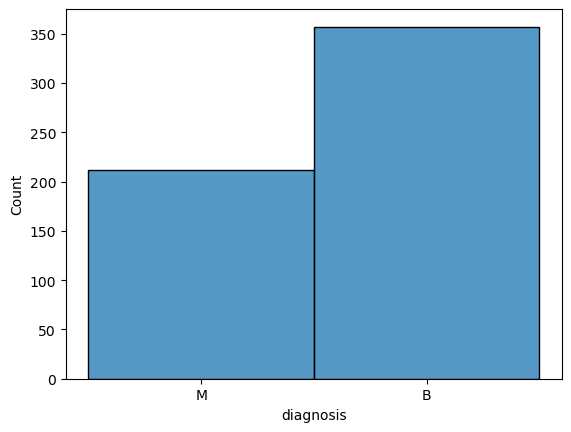

In [86]:
# Checking the Y variable distribution for imbalance :

sns.histplot(dd.diagnosis , discrete = True )

In [87]:
# checking for outliers

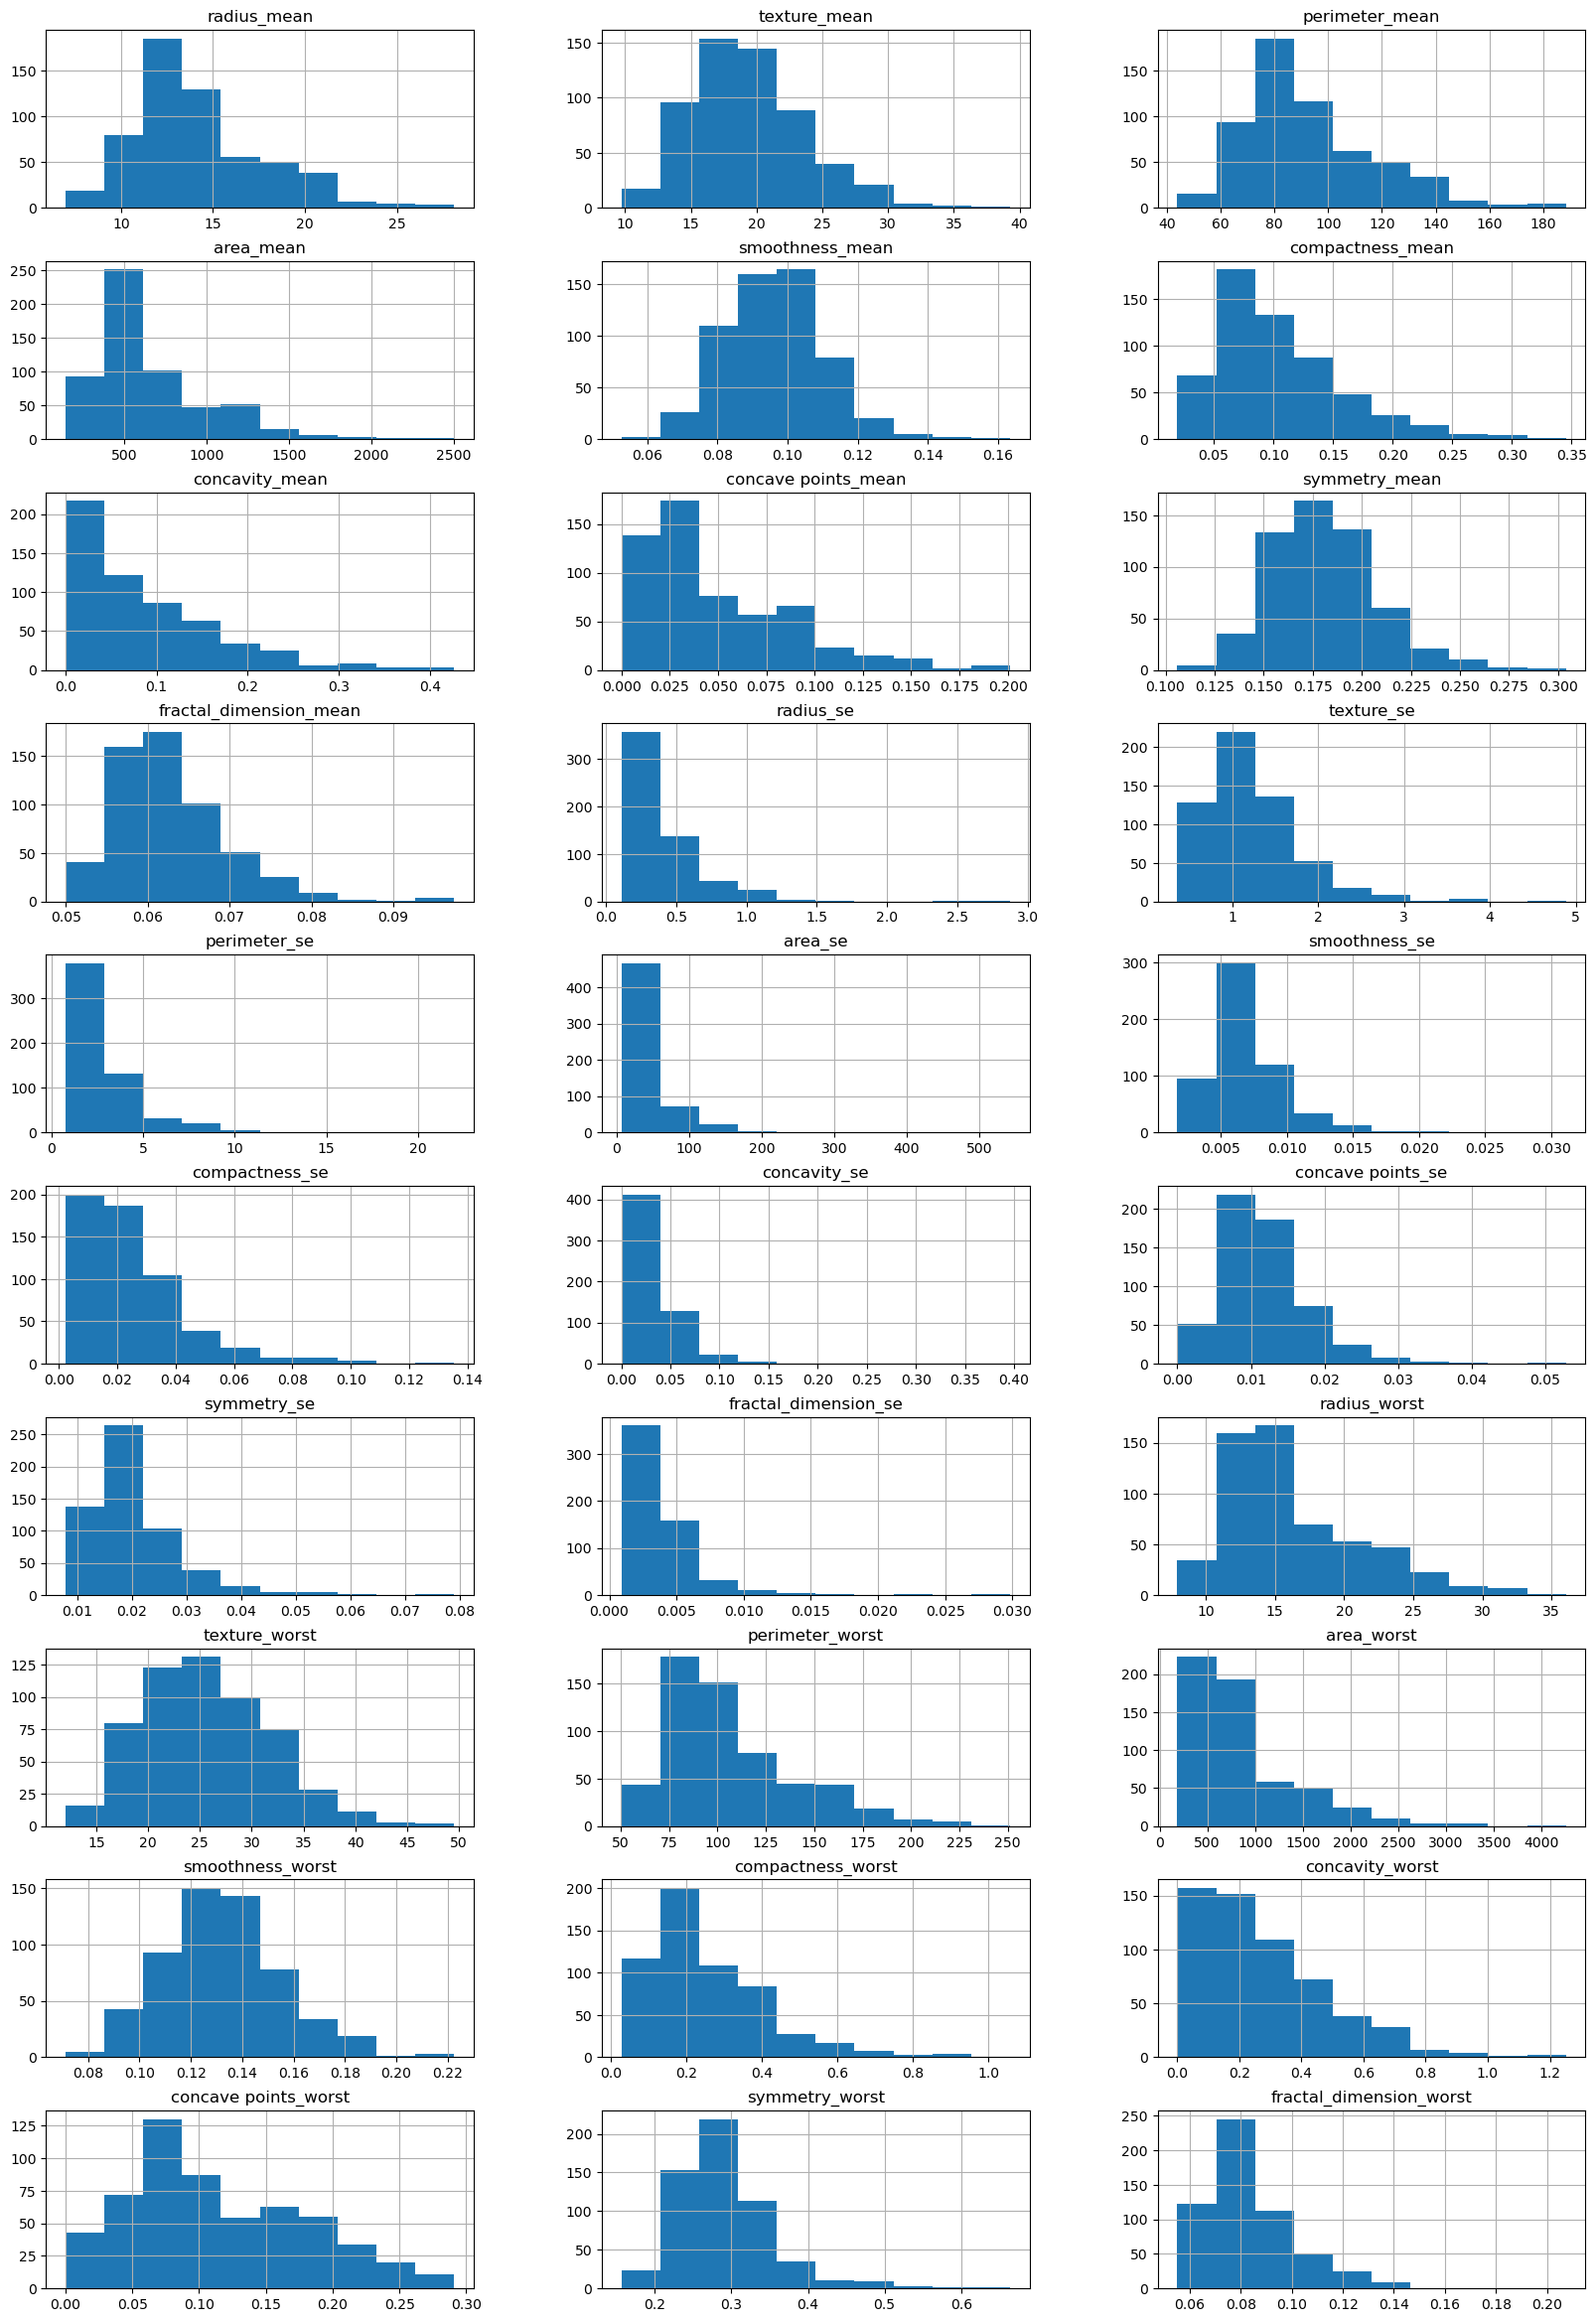

In [88]:

cols = len(dd.select_dtypes('number').columns)
dd.select_dtypes('number').hist(layout= (cols,3) , figsize=(20,3*cols))
plt.show()

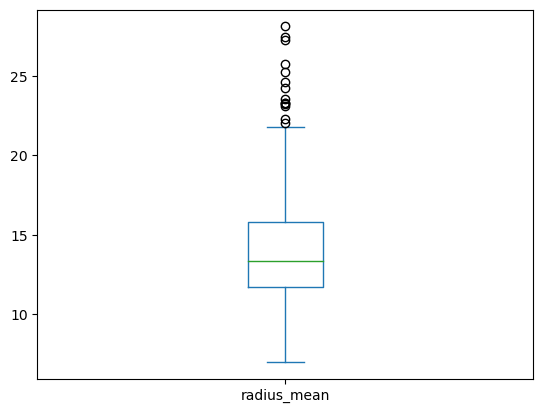

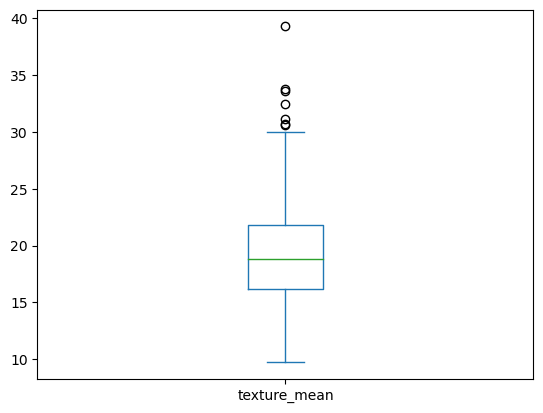

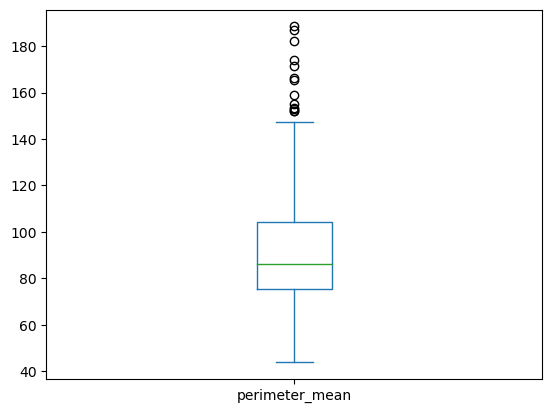

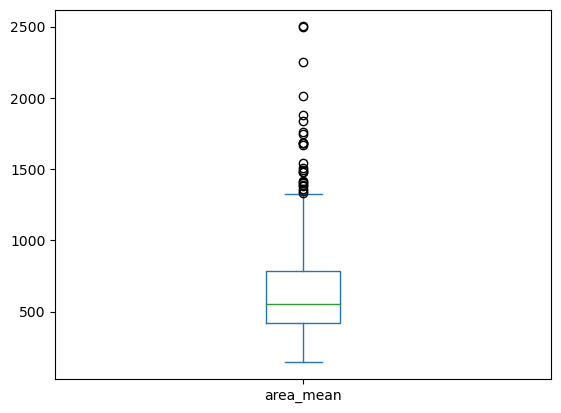

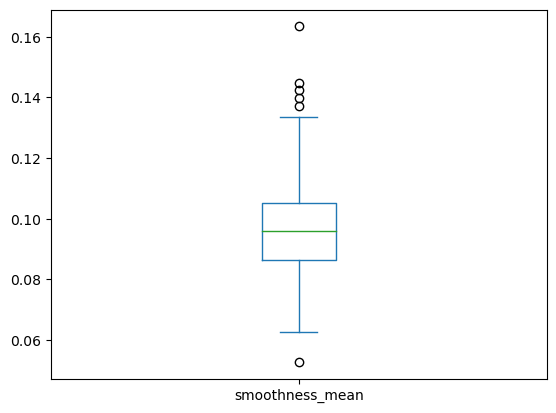

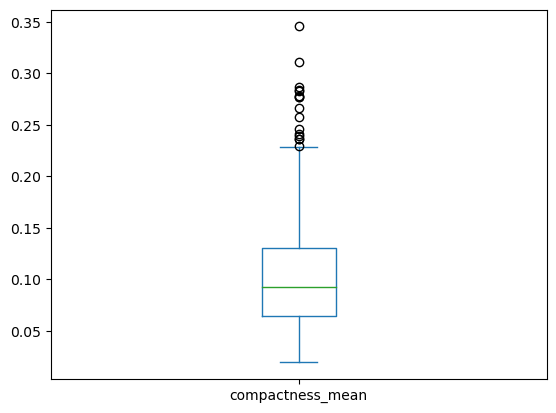

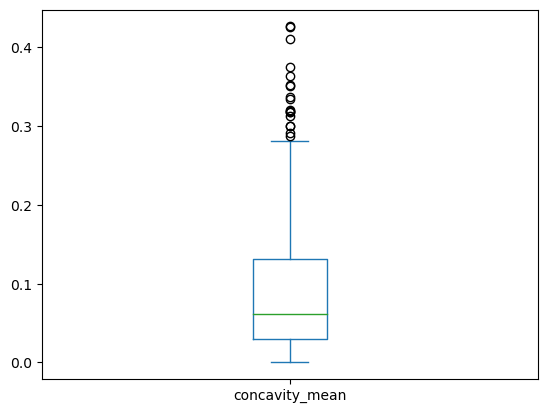

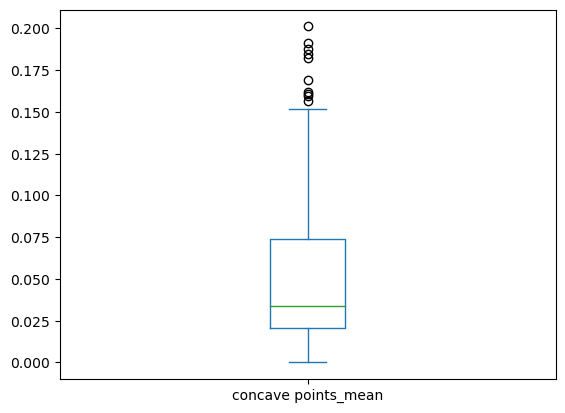

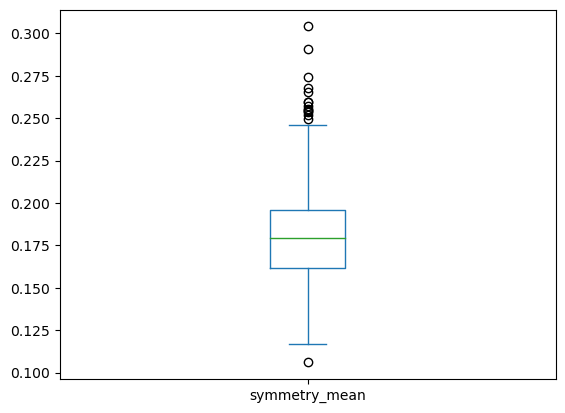

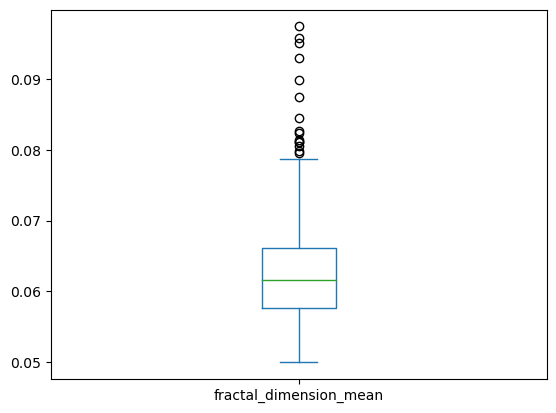

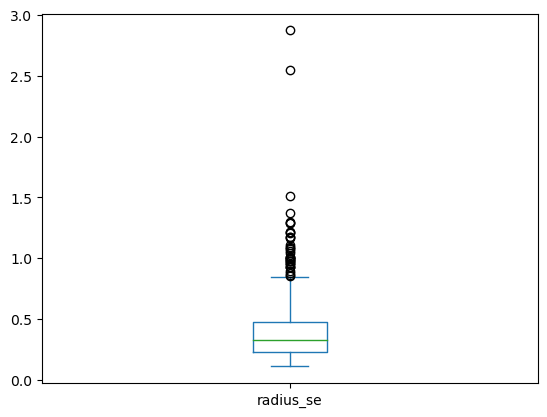

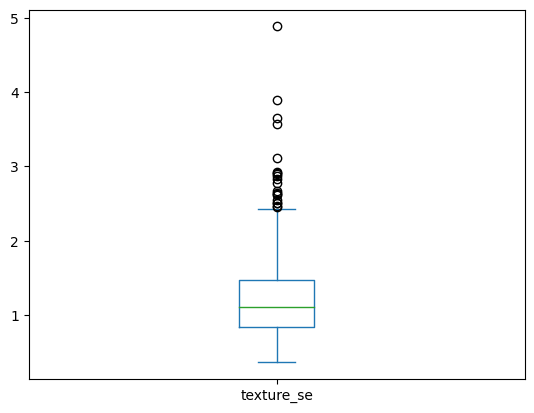

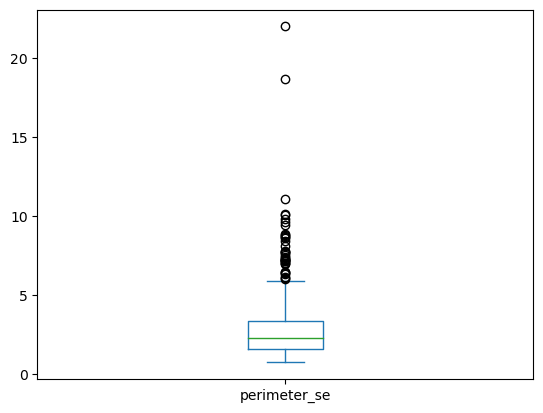

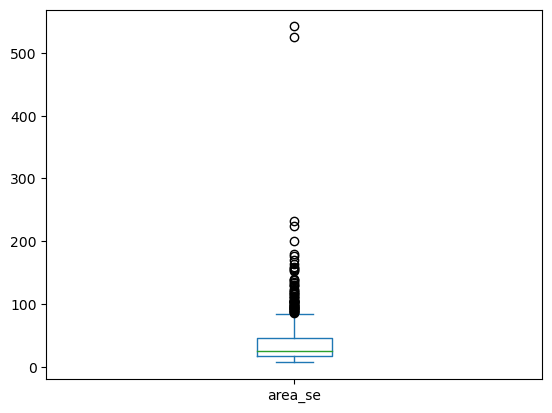

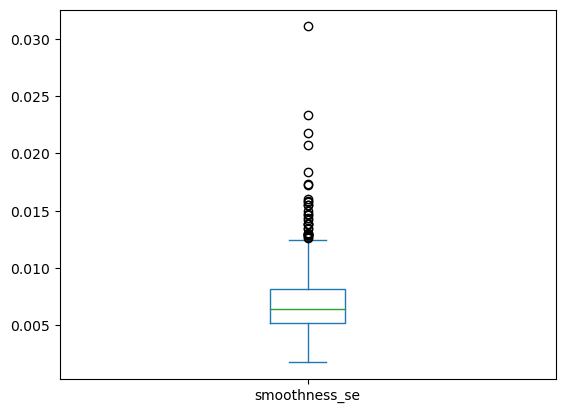

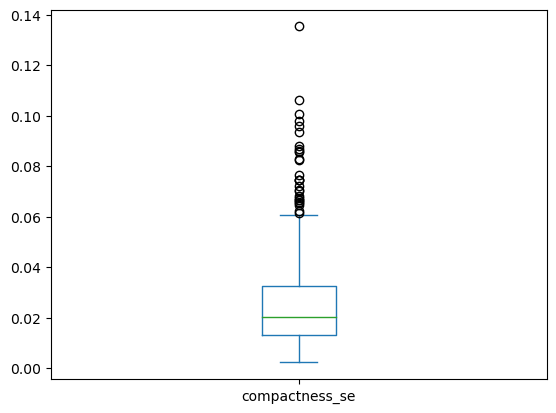

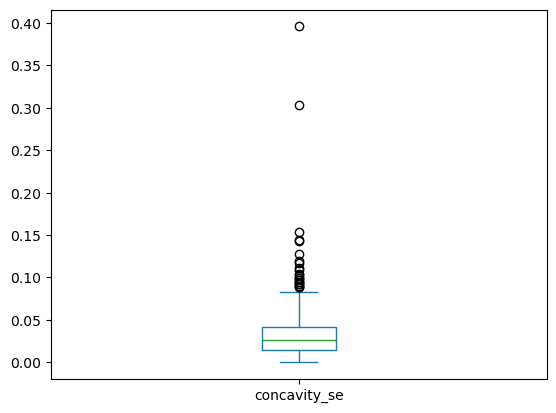

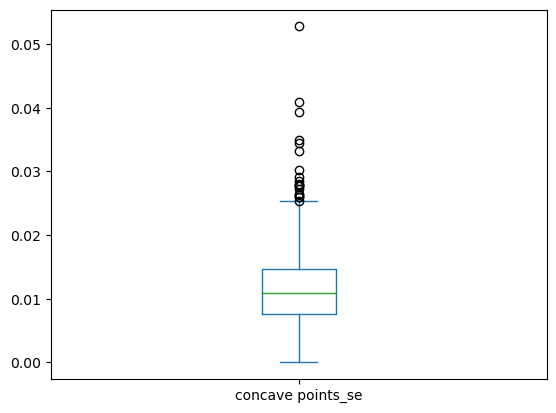

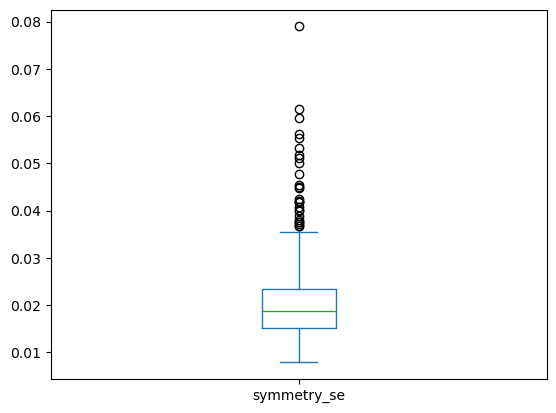

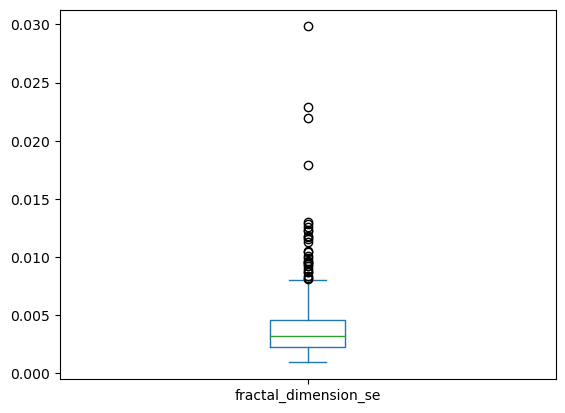

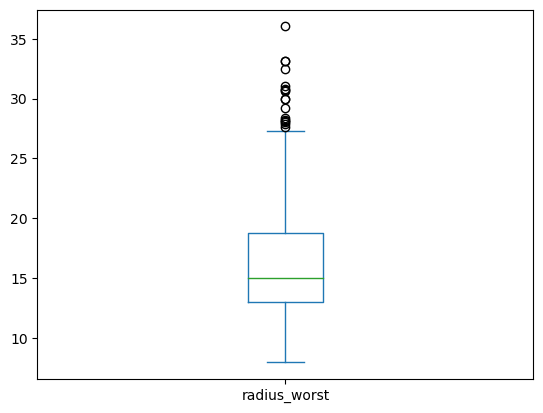

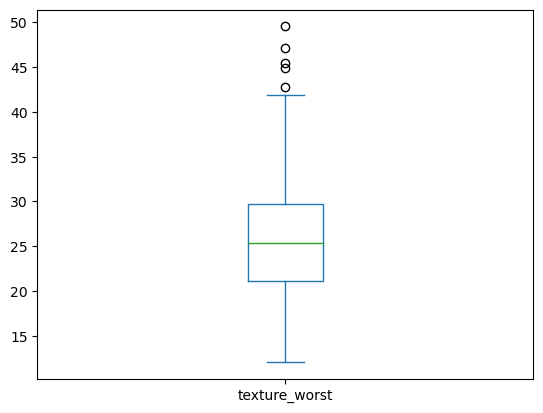

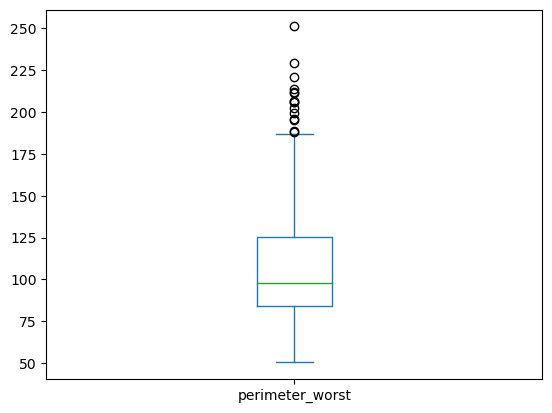

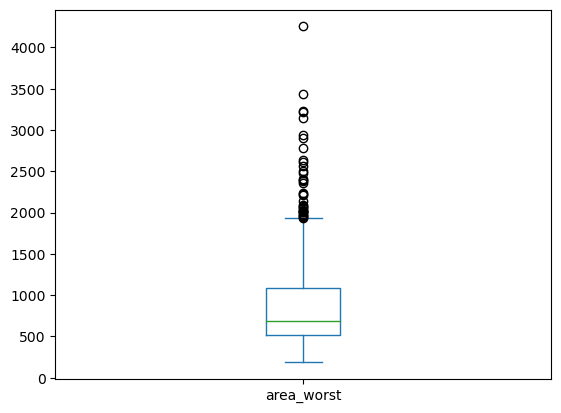

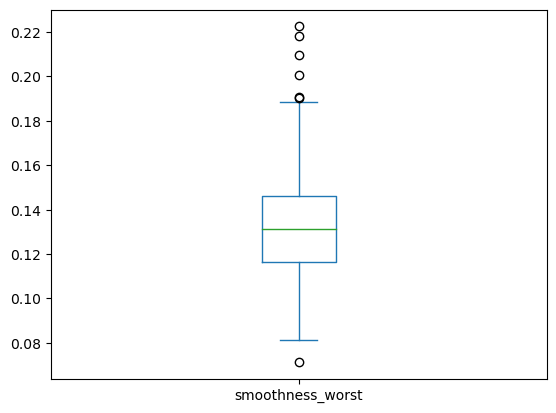

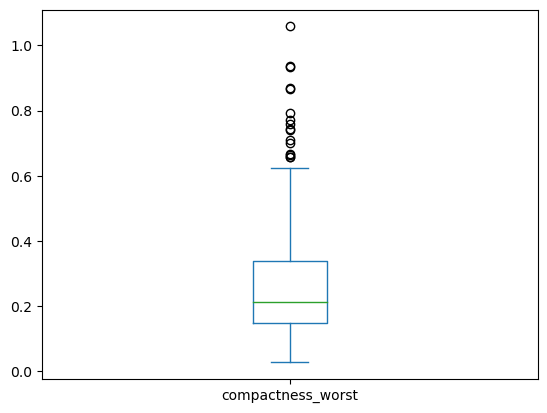

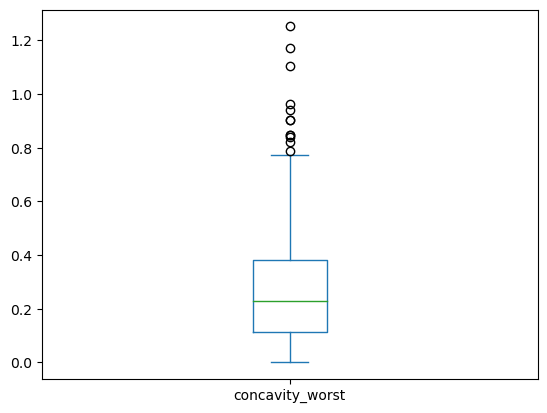

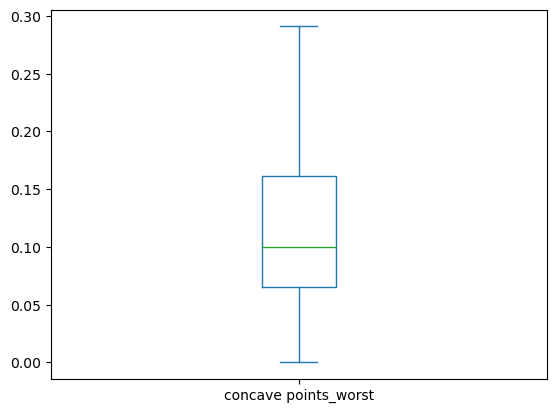

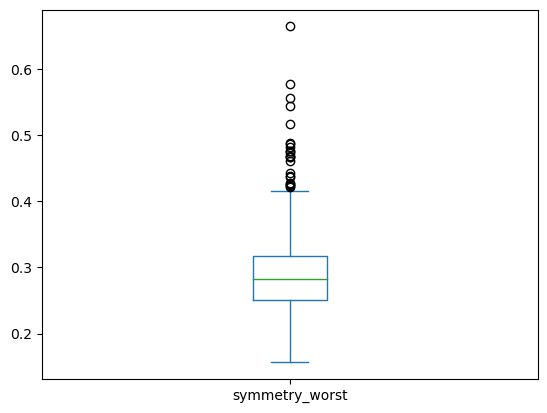

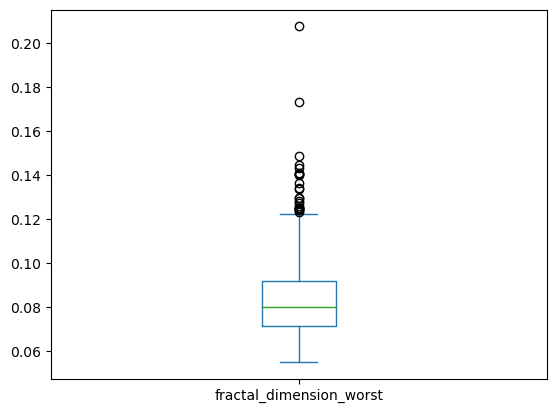

In [89]:
for m in dd.select_dtypes('number').columns:
    dd[m].plot(kind = 'box')
    plt.show()

In [90]:
y = dd['diagnosis']
X = dd.drop(columns= 'diagnosis')

In [91]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size= 0.2 , random_state=123)


## Building the model

In [120]:
scaler = MinMaxScaler().fit(X_train)
X_train_trsfm  = scaler.transform(X_train)
X_test_trsfm  = scaler.transform(X_test)

In [113]:
model1 = KNeighborsClassifier()
model1.fit(X_train_trsfm , y_train)
X_train_trsfm = np.ascontiguousarray(X_train_trsfm)
X_test_trsfm = np.ascontiguousarray(X_test_trsfm)

train_pred = model1.predict(X_train_trsfm)
test_pred = model1.predict(X_test_trsfm)

In [114]:
accuracy_score(y_train,train_pred)

0.9758241758241758

In [115]:
accuracy_score(y_test,test_pred)

0.9824561403508771

In [116]:
confusion_matrix(y_train, train_pred)

array([[282,   2],
       [  9, 162]], dtype=int64)

In [117]:
len(y_train[y_train != train_pred])

11

In [118]:
confusion_matrix(y_test, test_pred)

array([[73,  0],
       [ 2, 39]], dtype=int64)

In [119]:
len(y_test[y_test != test_pred])

2